# Question 1:  What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

## K-Means Clustering

K-Means is a clustering algorithm that divides data into K predefined groups by minimizing the distance between data points and their cluster center.

## Hierarchical Clustering


Hierarchical Clustering is a clustering method that creates a tree-like structure (dendrogram) showing how data points are grouped step by step.

# Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

## Silhouette Score


The Silhouette Score is a metric used to measure how well data points are clustered by checking how similar a point is to its own cluster compared to other clusters.

## Purpose

The purpose of the Silhouette Score is to:

Evaluate the quality of clustering

Check cluster separation

Help choose the optimal number of clusters (K)

# Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer:**
The core parameters of DBSCAN are **eps (ε)**, **minPts**, and the **distance metric**.
**eps** defines the neighborhood radius, **minPts** specifies the minimum number of points required to form a dense cluster, and the **distance metric** determines how distances between points are calculated, together influencing cluster formation and noise detection.


# Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:**
Feature scaling is important because clustering algorithms like K-Means and DBSCAN rely on distance calculations; without scaling, features with larger values dominate the distance, leading to biased and incorrect cluster formation.


# Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Answer:**
The Elbow Method is a technique used in K-Means clustering to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against different values of K and selecting the point where the decrease in WCSS starts to slow down (the “elbow”), indicating a suitable number of clusters.


# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)

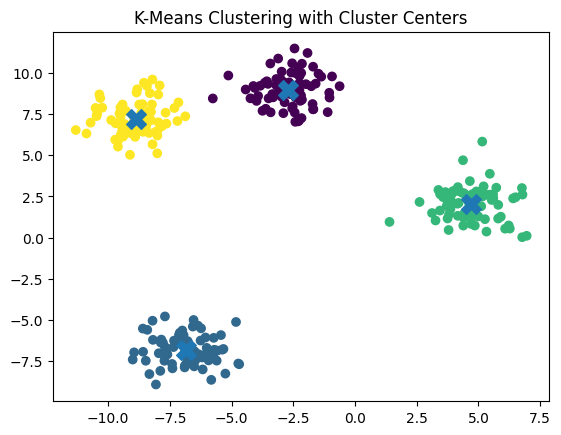

In [2]:


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_


plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.show()


# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)

In [5]:
# Question 7: DBSCAN on Wine dataset with StandardScaler

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
X, y = load_wine(return_X_y=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)



Number of clusters found (excluding noise): 0


# Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
(Include your Python code and output in the code box below.)

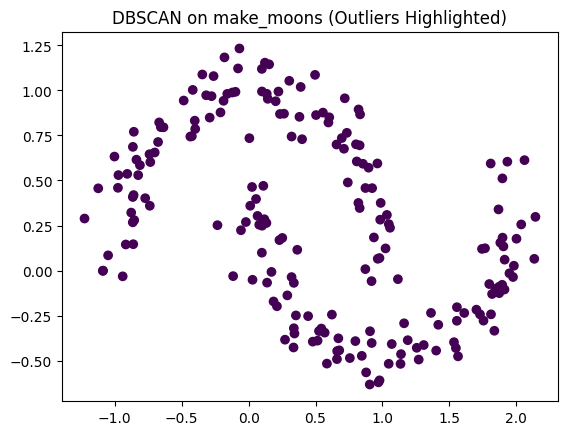

In [6]:


import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


outliers = labels == -1


plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN on make_moons (Outliers Highlighted)")
plt.show()


# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)

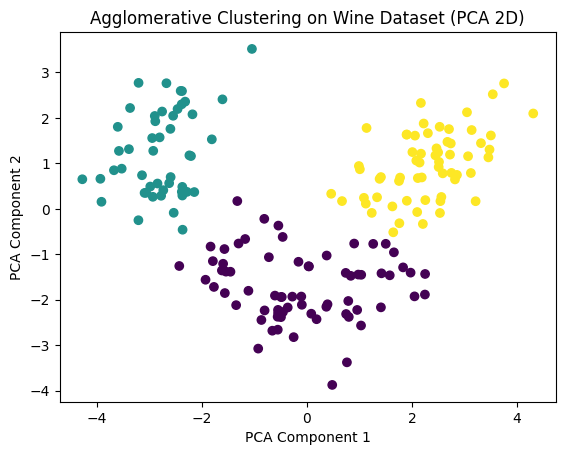

In [8]:


import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

X, y = load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product
## purchase history across categories.
## Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

## Clustering Algorithm

I would use K-Means because the dataset is large, numeric, and marketing teams usually want a fixed number of customer segments.
Optionally, DBSCAN can be used to detect outlier customers.


## Data Preprocessing

Handle missing values using mean/median imputation

Encode categorical variables using One-Hot Encoding

Apply StandardScaler to scale features so no variable dominates distance calculations

## Determining Number of Clusters

Use the Elbow Method to find where WCSS reduction slows down

Validate using the Silhouette Score

## Business Benefit for Marketing

Personalized promotions for each customer segment

Improved customer retention and conversion rates

Better understanding of high-value and low-value customers


In [10]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = {
    "Age": [25, 34, 45, 23, 40, 35],
    "Annual_Income": [30000, 50000, 80000, 20000, 70000, 60000],
    "Spending_Score": [40, 60, 80, 20, 75, 65]
}

df = pd.DataFrame(data)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)


score = silhouette_score(X_scaled, labels)

print("Cluster Labels:", labels)
print("Silhouette Score:", round(score, 2))


Cluster Labels: [1 2 0 1 0 2]
Silhouette Score: 0.54
